In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import gc
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pylab as py 
import statsmodels.api as sm

In [2]:
df=pd.read_csv("/home/lenovo/Downloads/finaldata.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
df_test = df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [5]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["Category"] == 'genuine', "class"] = "0"
df.loc[df["Category"] != 'genuine', "class"] = "1"

In [6]:
df = df[['id', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'default_profile', 'default_profile_image', 'protected', 'verified', 'class']]

In [7]:
list = [['default_profile', 'default_profile_image', 'protected', 'verified', 'class']]
for i in list:
    df[i] = df[i].astype('category')

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Exploratory Data Analysis on raw data for feature selection and data development

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     11017 non-null  int64   
 1   screen_name            11017 non-null  object  
 2   statuses_count         11017 non-null  int64   
 3   followers_count        11017 non-null  int64   
 4   friends_count          11017 non-null  int64   
 5   favourites_count       11017 non-null  int64   
 6   listed_count           11017 non-null  int64   
 7   default_profile        1477 non-null   category
 8   default_profile_image  72 non-null     category
 9   protected              78 non-null     category
 10  verified               11 non-null     category
 11  class                  11017 non-null  category
dtypes: category(5), int64(6), object(1)
memory usage: 656.8+ KB


In [9]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

id  statuses_count  followers_count  friends_count  \
count      11017.00000     11017.00000      11017.00000    11017.00000   
mean  1235671181.91831      6581.37388       1126.98212      656.01008   
std   1084879756.90642     19725.68212      30698.01764     3039.02263   
min       678033.00000         0.00000          0.00000        0.00000   
25%    106849778.00000        46.00000          6.00000       40.00000   
50%    633895744.00000        99.00000        131.00000      202.00000   
75%   2360091846.00000      4272.00000        520.00000      542.00000   
max   4331279781.00000    399555.00000    2991573.00000   211890.00000   

       favourites_count  listed_count  
count       11017.00000   11017.00000  
mean         1492.33857      14.55051  
std          6856.57435     304.79843  
min             0.00000       0.00000  
25%             0.00000       0.00000  
50%             0.00000       1.00000  
75%           196.00000       5.00000  
max        313954.00000   24348.00000

<function matplotlib.pyplot.show(close=None, block=None)>

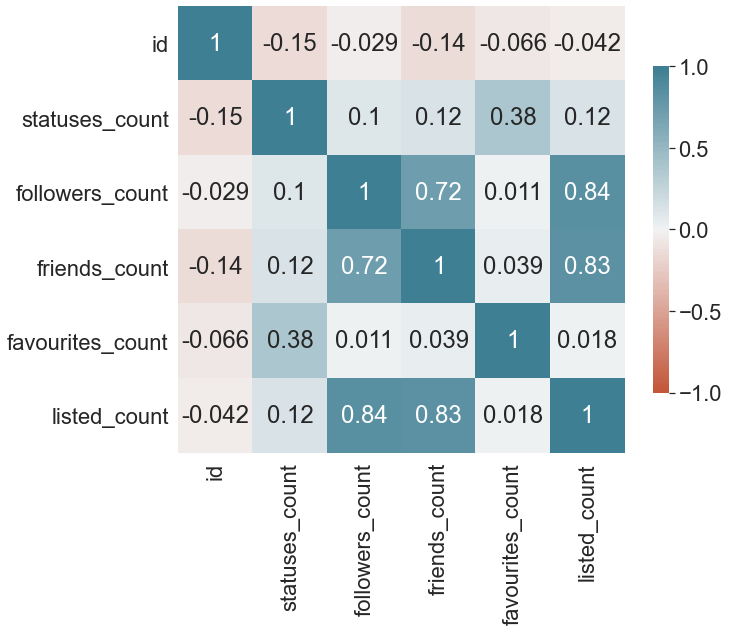

In [6]:
corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(10, 10)} )
sns.set(font_scale = 2)
sns.heatmap(corrMatrix, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), square = True, cbar_kws = {'shrink': 0.6}, annot = True)
plt.show

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     11017 non-null  int64   
 1   screen_name            11017 non-null  object  
 2   statuses_count         11017 non-null  int64   
 3   followers_count        11017 non-null  int64   
 4   friends_count          11017 non-null  int64   
 5   favourites_count       11017 non-null  int64   
 6   listed_count           11017 non-null  int64   
 7   default_profile        11017 non-null  category
 8   default_profile_image  11017 non-null  category
 9   protected              11017 non-null  category
 10  verified               11017 non-null  category
 11  class                  11017 non-null  category
dtypes: category(5), int64(6), object(1)
memory usage: 613.6+ KB


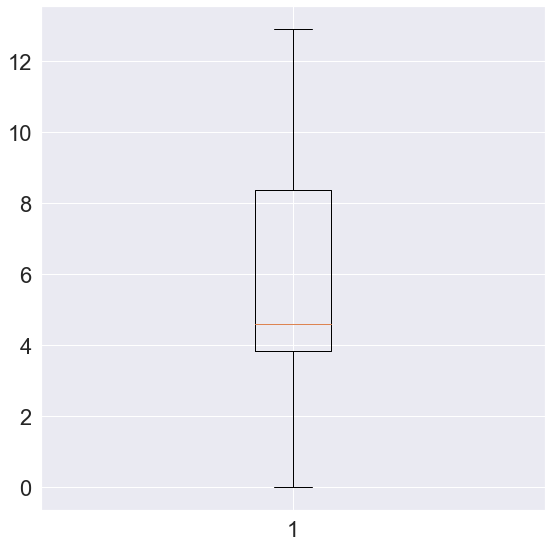

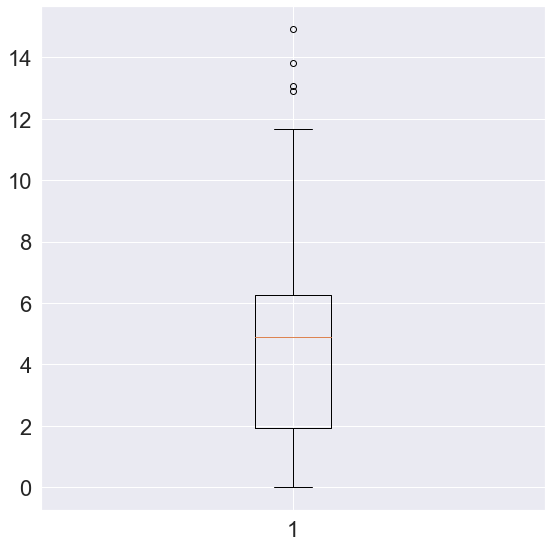

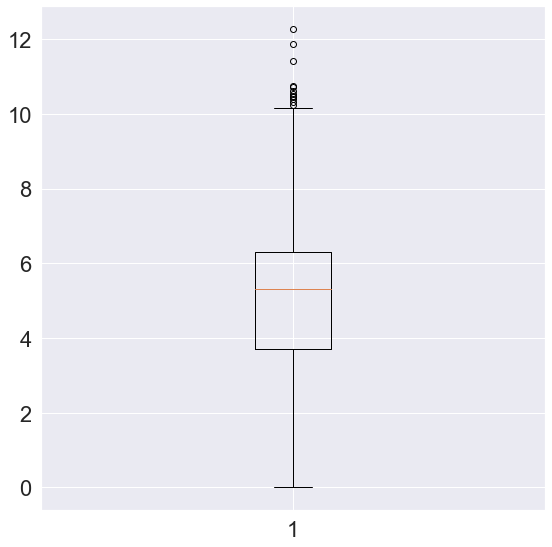

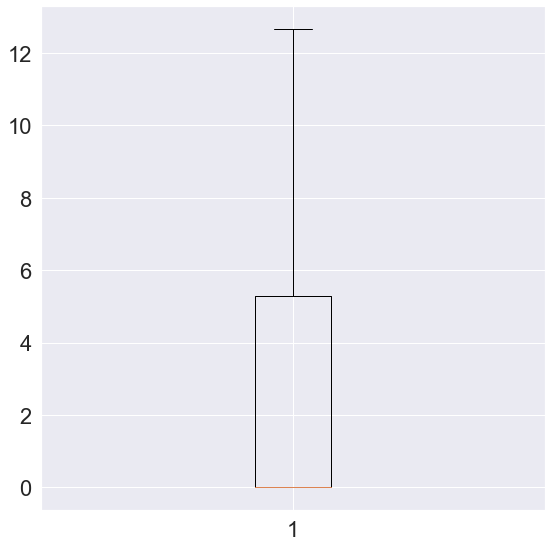

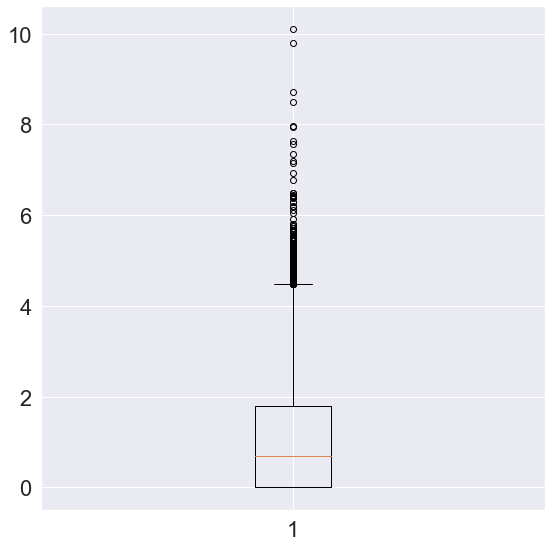

In [12]:
list = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']
for i in list:
    fig = plt.figure(figsize =(7, 7)) 
    # Creating axes instance 
    ax = fig.add_axes([1, 1, 1, 1]) 
    #change of origin by adding 1 to the original data 
    ax.boxplot(np.log(df[i] + 1 ))
        


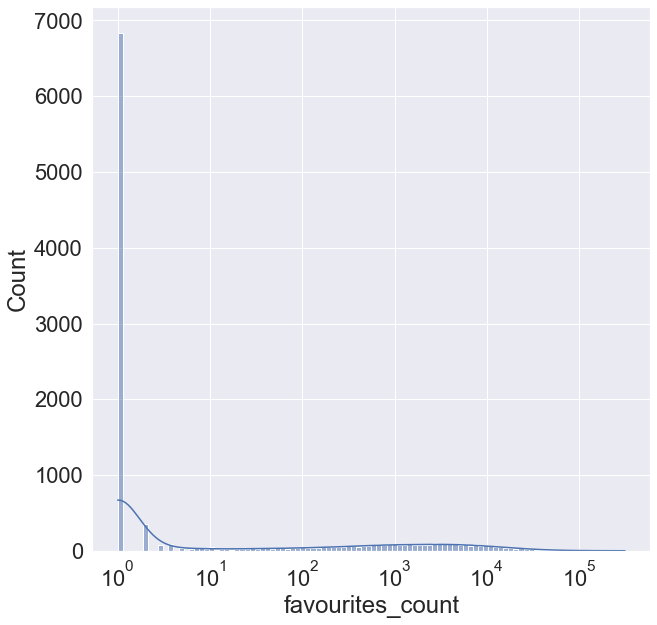

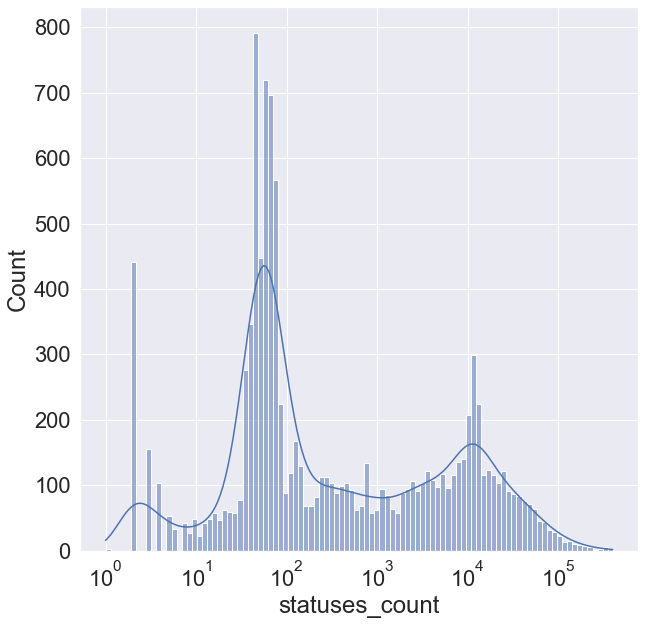

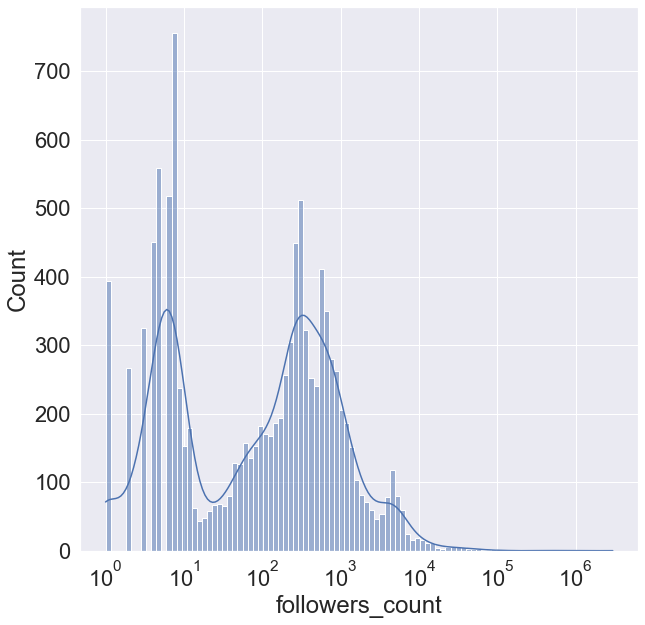

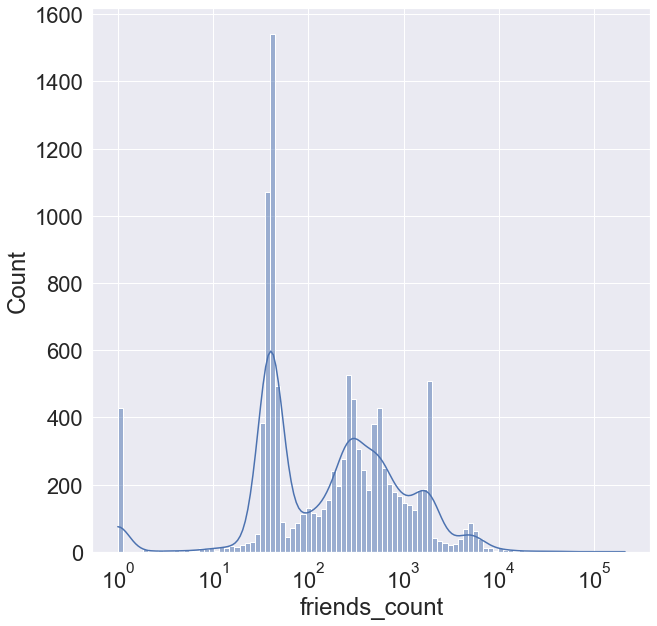

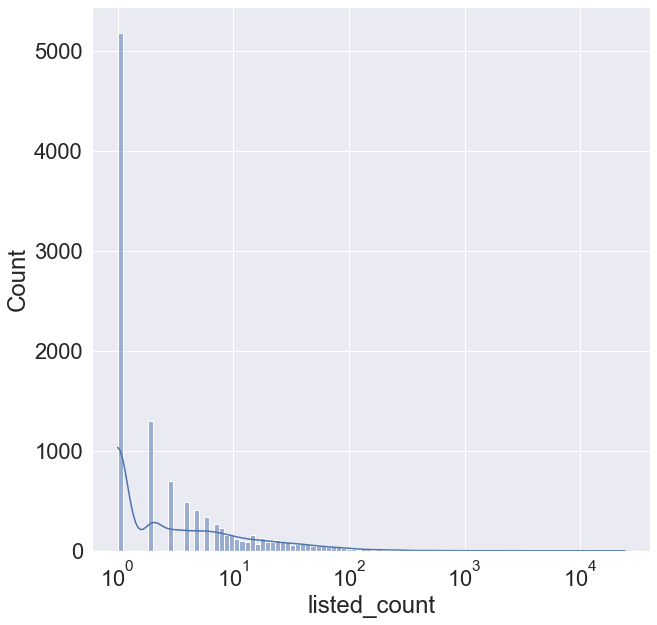

In [7]:
list = {'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count'}
for i in list:
    fig, ax = plt.subplots(1)
    sns.histplot(df[i]+1, bins = 100, log_scale= True, kde = True)
    #np.log(df[i]+1).plot.hist(bins = 100)


In [58]:
from scipy import stats

In [47]:
type(df['statuses_count'])

pandas.core.series.Series

In [59]:
#look for details
crim_boxcox = stats.boxcox(df['statuses_count']+1)[0]

<AxesSubplot:ylabel='Count'>

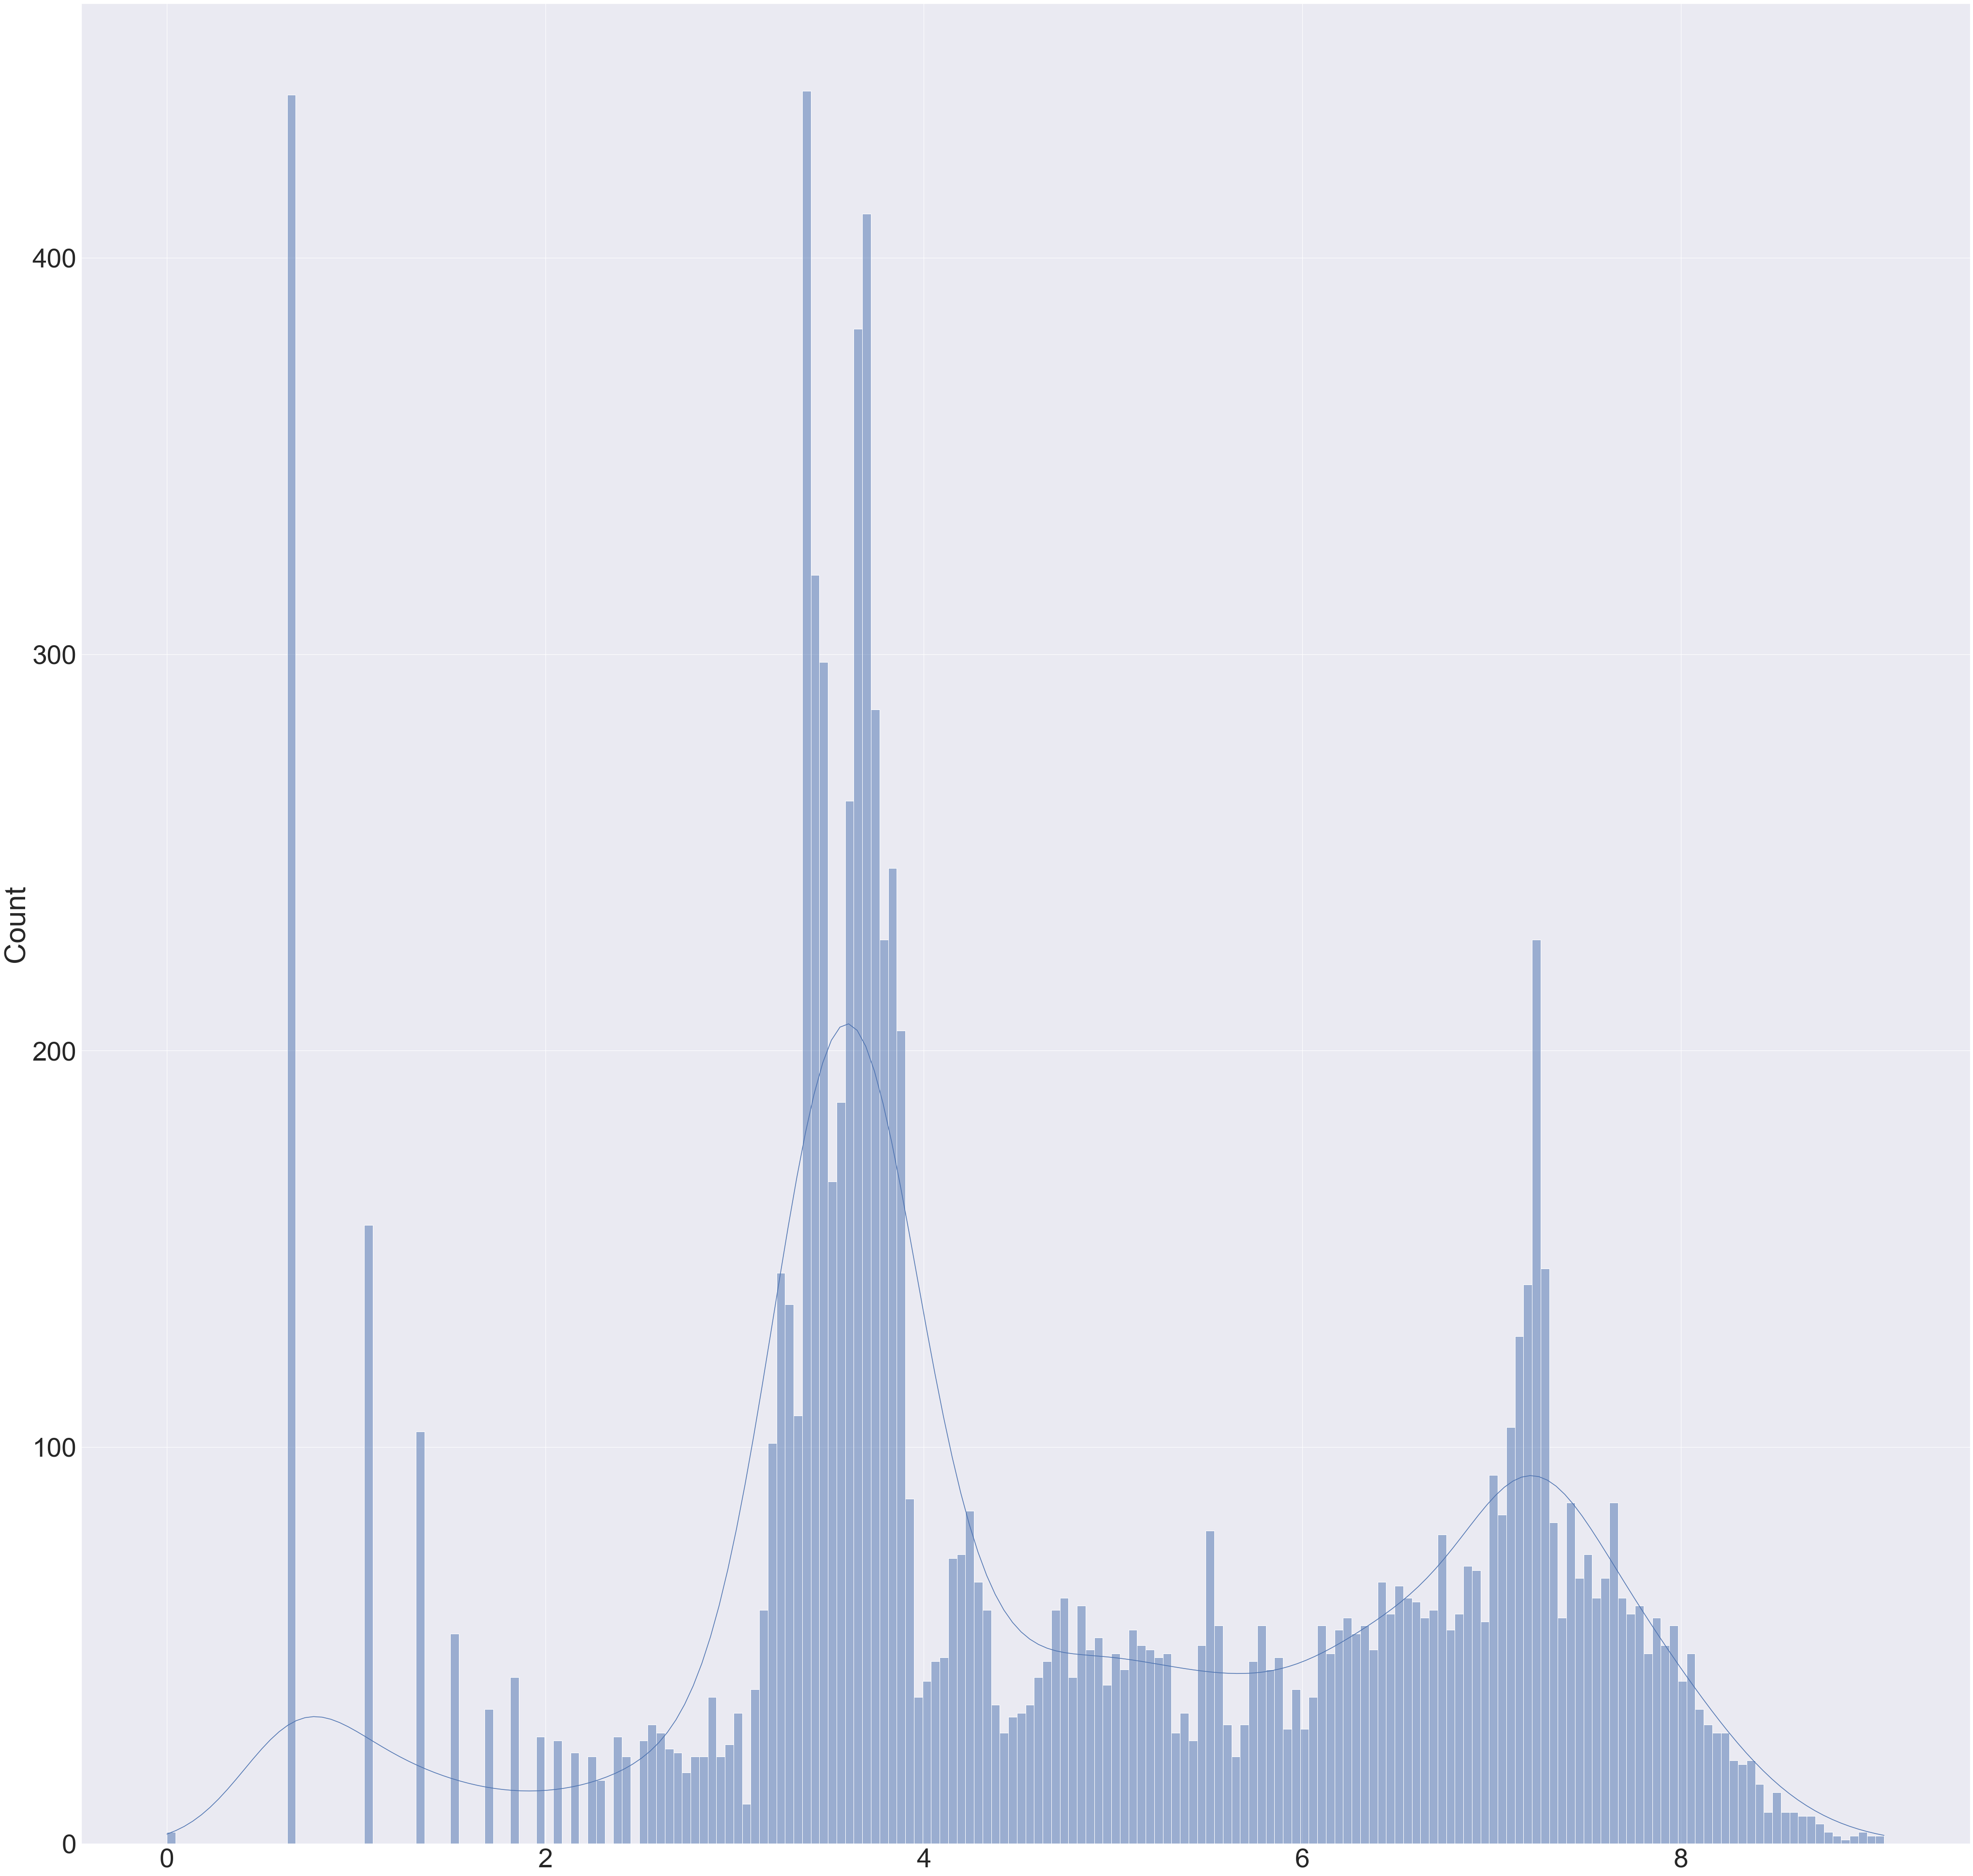

In [60]:
sn.histplot(data = crim_boxcox, bins = 200, kde = True)

In [72]:
pd.crosstab(df['verified'], df['protected'])

protected  False  True
verified              
False      10928    78
True          11     0

In [68]:
pd.crosstab(df['default_profile'], df['protected'])

protected        False  True
default_profile             
False             9484    56
True              1455    22

In [69]:
pd.crosstab(df['default_profile'], df['protected'])

protected        False  True
default_profile             
False             9484    56
True              1455    22

In [70]:
pd.crosstab(df['default_profile'], df['default_profile_image'])

default_profile_image  False  True
default_profile                   
False                   9494    46
True                    1451    26

In [74]:
pd.crosstab(df['class'], df['verified'])

verified  False  True
class                
False      3463    11
True       7543     0

In [78]:
pd.crosstab(df['class'], df['protected'], margins = True)

protected  False  True    All
class                        
False       3396    78   3474
True        7543     0   7543
All        10939    78  11017

In [77]:
pd.crosstab(df['protected'], df['verified'], margins = True)

verified   False  True    All
protected                    
False      10928    11  10939
True          78     0     78
All        11006    11  11017

In [80]:
pd.crosstab(df['verified'], df['class'], margins = True)

class     False  True    All
verified                    
False      3463  7543  11006
True         11     0     11
All        3474  7543  11017

In [27]:
plt.clf()

<Figure size 432x288 with 0 Axes>

class                                                     False  True
verified protected default_profile default_profile_image             
False    False     False           False                   2374  7055
                                   True                       2    43
                   True            False                    999   429
                                   True                      10    16
         True      False           False                     55     0
                                   True                       1     0
                   True            False                     22     0
True     False     False           False                     10     0
                   True            False                      1     0

<Figure size 432x288 with 0 Axes>

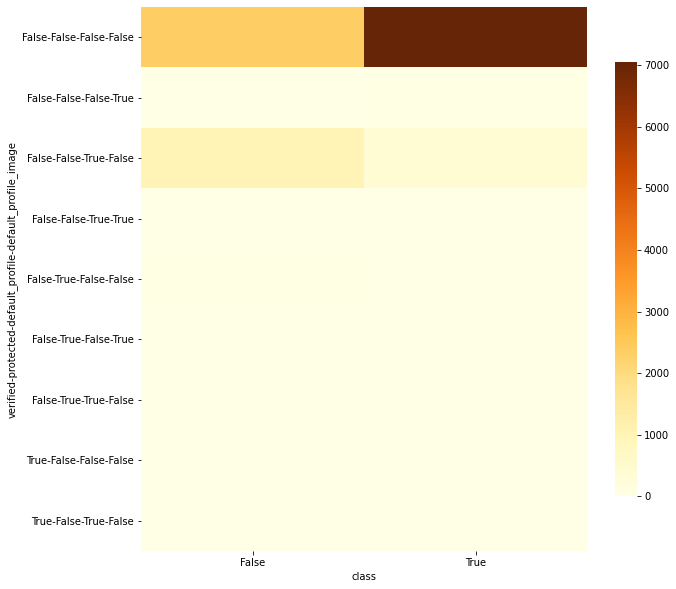

In [30]:
plt.clf()
cross = pd.crosstab(index = [df['verified'], df['protected'], df['default_profile'], df['default_profile_image']], columns = df['class'])
plt.subplots(figsize=(10,10))
plt.tick_params(labelsize = 10)
sns.heatmap(cross, cmap = 'YlOrBr', cbar_kws = {'shrink': 0.8})
cross

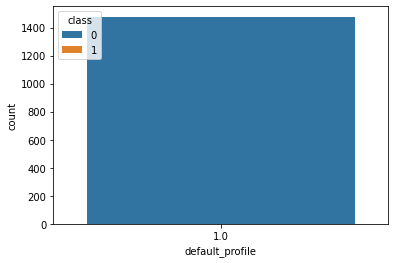

In [15]:
df_bar = df[['verified', 'protected', 'class', 'default_profile', 'default_profile_image']]

fig_1 = sns.countplot(x = 'protected', data = df_bar, hue = 'class')
fig_2 = sns.countplot(x = 'default_profile', data = df_bar)
plt.show()

In [23]:
plt.close()

In [9]:
gc.collect()

20

In [ ]:
df_p

In [10]:
df_pairplot = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'class']]

In [11]:
df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
df_pairplot['friends_count'] = np.log(df_pairplot['friends_count']+1)
df_pairplot['favourites_count'] = np.log(df_pairplot['favourites_count']+1)
df_pairplot['listed_count'] = np.log(df_pairplot['listed_count']+1)

<ipython-input-11-ca01b3625c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
<ipython-input-11-ca01b3625c75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
<ipython-input-11-ca01b3625c75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

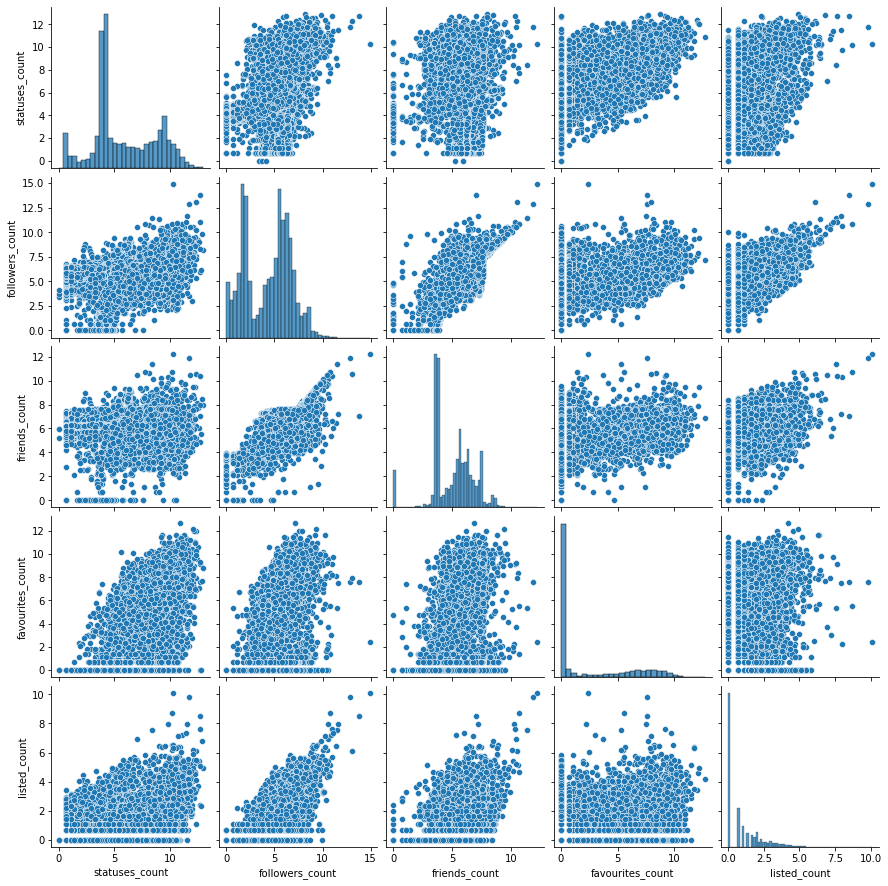

In [12]:
sns.pairplot(df_pairplot)

In [14]:
plt.close()

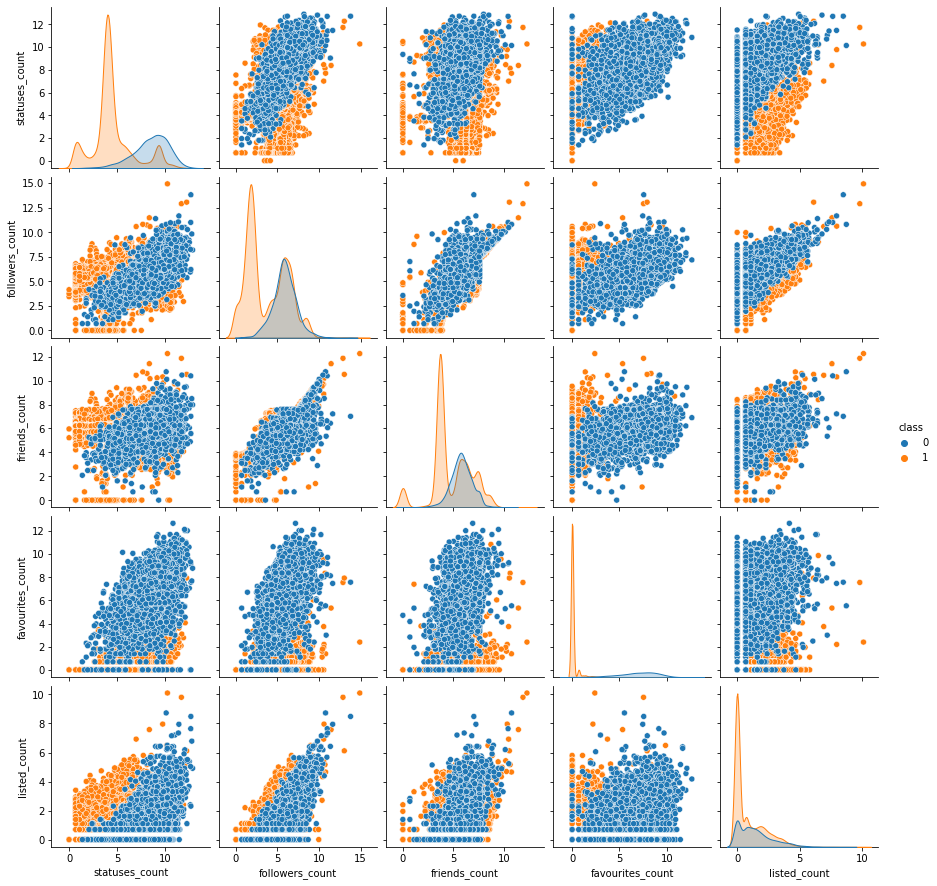

In [14]:
sns.pairplot(df_pairplot, hue = 'class')

Text(0.5, 0, 'Z Label')

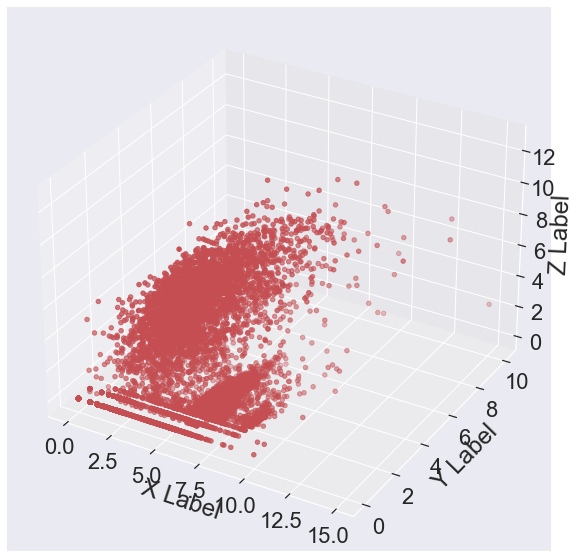

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log(df['followers_count']+1), np.log(df['listed_count']+1), np.log(df['favourites_count']+1), c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [14]:
fig = px.scatter_3d(df, x=np.log(df['statuses_count']+1), y=np.log(df['followers_count']+1), z=np.log(df['listed_count']+1),color=df['Category'],labels= True)
fig.show()

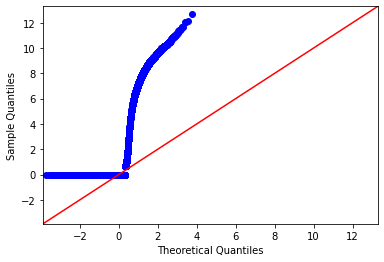

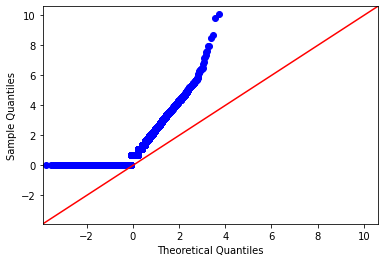

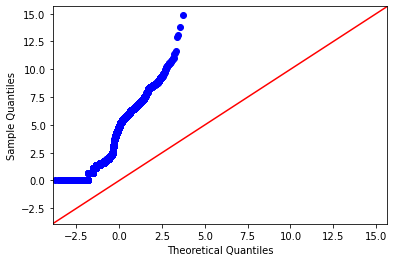

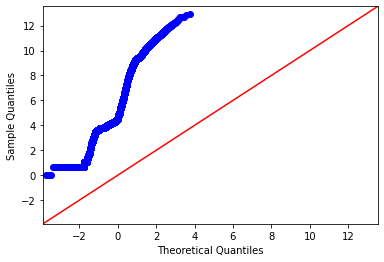

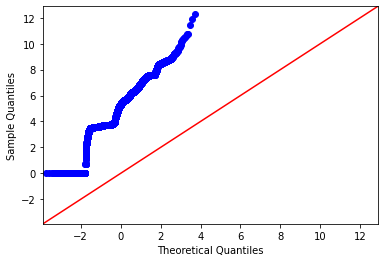

In [14]:
fig_5 = sm.qqplot(np.log(df['favourites_count']+1), line = '45')
fig_4 = sm.qqplot(np.log(df['listed_count']+1), line = '45')
fig_3 = sm.qqplot(np.log(df['followers_count']+1), line = '45')
fig_2 = sm.qqplot(np.log(df['statuses_count']+1), line = '45')
fig_1 = sm.qqplot(np.log(df['friends_count']+1), line = '45')
plt.show()

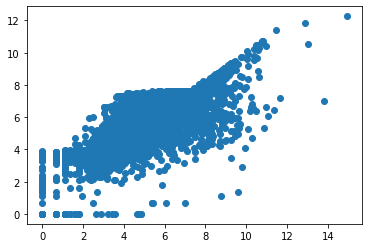

In [16]:
plt.scatter(np.log(df['followers_count']+1), np.log(df['friends_count']+1))